## SVM classification practice with scatter and circular dataset

In [1]:
#Importing libs

%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.svm import SVC

## Taking scatter data & Plotting point

(500, 2) (500,)


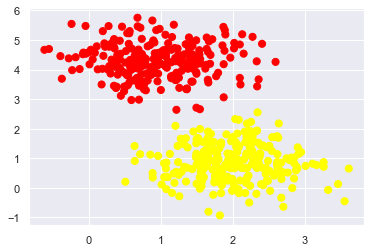

In [2]:
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.60)
print(X.shape , y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
# Creating SVC with linear kernal

In [4]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
print("number of support point " , model.n_support_)
print("support vectors " , model.support_vectors_)
print("support vector point index " , model.support_)
print("support vector dual_coef_ " , model.dual_coef_)

number of support point  [1 2]
support vectors  [[1.54209773 2.65998103]
 [1.2021156  2.09643731]
 [2.3439366  2.55327673]]
support vector point index  [259 233 359]
support vector dual_coef_  [[-12.68865026   7.27203366   5.4166166 ]]


In [6]:
print(X[18,:],y[18])
print(X[25,:],y[25])
print(X[7,:],y[7])

[2.06790473 0.95733633] 1
[2.85193714 0.83689477] 1
[0.69811249 4.59267621] 0


In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

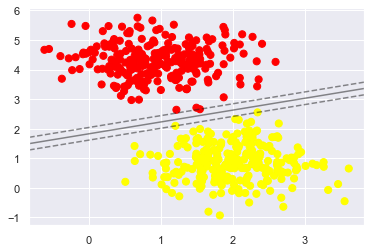

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [9]:
model.support_vectors_

array([[1.54209773, 2.65998103],
       [1.2021156 , 2.09643731],
       [2.3439366 , 2.55327673]])

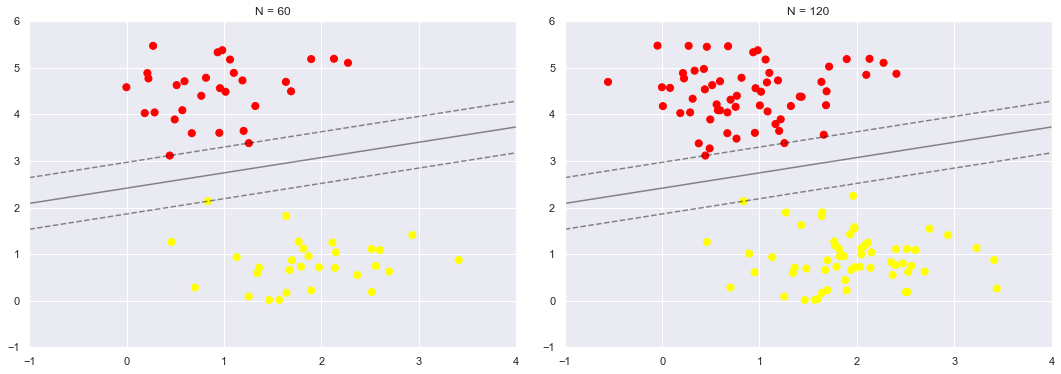

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Taking circular dataset to practice svc

(100, 2) (100,)


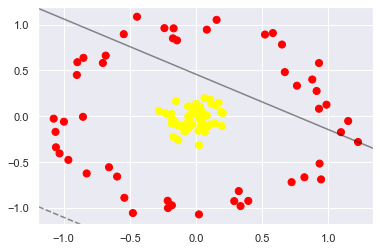

In [11]:
X, y = make_circles(100, factor=.1, noise=.1)
print(X.shape, y.shape )
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Same Circular dataset with rbf kernel funtion

In [12]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

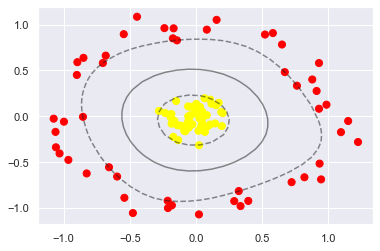

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening Margins

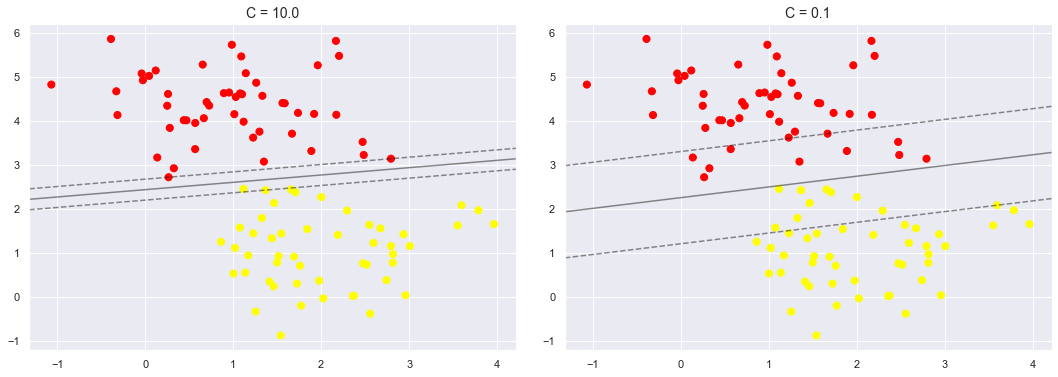

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)